In [2]:
import pandas as pd
import talib

In [3]:
df = pd.read_csv("data/ALL.csv", parse_dates=["timestamp"])

In [4]:
df

,timestamp,nvda_open,nvda_high,nvda_low,nvda_close,nvda_volume,amd_open,amd_high,amd_low,amd_close,...,btc_close,btc_volume,gold_open,gold_high,gold_low,gold_close,gold_volume,overall_sentiment_score,nvda_sentiment_score,nvda_relevance_score
0,2020-01-02 09:00:00+00:00,5.9180,5.9481,5.9180,5.9389,60000,46.63,46.78000,46.63,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02 10:00:00+00:00,5.9389,5.9486,5.9372,5.9449,29920,46.64,47.00000,46.63,46.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 11:00:00+00:00,5.9486,5.9501,5.9436,5.9436,37800,46.85,46.92000,46.71,46.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-02 12:00:00+00:00,5.9329,5.9481,5.9242,5.9464,614480,46.76,46.88000,46.63,46.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-02 13:00:00+00:00,5.9456,5.9625,5.9247,5.9556,1660520,46.86,46.95000,46.63,46.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21920,2025-06-30 19:00:00+00:00,157.7411,158.6510,157.6611,157.8611,26770205,141.72,142.24000,141.22,141.89,...,107760.75,10943.0,3298.40,3309.47,3297.98,3308.65,10356.0,0.211782,0.053219,0.150592
21921,2025-06-30 20:00:00+00:00,157.8611,158.6600,155.9600,157.7811,72869000,141.89,144.01955,141.01,141.70,...,107528.57,9128.0,3308.65,3309.13,3302.22,3302.95,4943.0,0.358923,0.043446,0.043264
21922,2025-06-30 21:00:00+00:00,157.7811,158.6600,155.9600,157.7811,223935,141.65,143.77955,141.01,141.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190412,0.122056,0.208046
21923,2025-06-30 22:00:00+00:00,157.7611,157.7911,157.4911,157.5113,219009,141.52,141.75000,141.33,141.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [5]:
df["EMA_10"] = talib.EMA(df["nvda_close"], timeperiod=10)
df["RSI_14"] = talib.RSI(df["nvda_close"], timeperiod=14)
df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
    df["nvda_close"], fastperiod=12, slowperiod=26, signalperiod=9
)
df["ATR_14"] = talib.ATR(df["nvda_high"], df["nvda_low"], df["nvda_close"], timeperiod=14)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df.corr().sort_values(by="nvda_close", ascending=False)

,timestamp,nvda_open,nvda_high,nvda_low,nvda_close,nvda_volume,amd_open,amd_high,amd_low,amd_close,...,gold_volume,overall_sentiment_score,nvda_sentiment_score,nvda_relevance_score,EMA_10,RSI_14,MACD,MACD_signal,MACD_hist,ATR_14
nvda_close,0.858313,0.999945,0.999960,0.999963,1.000000,-0.034307,0.682899,0.683552,0.682317,0.682789,...,0.254794,0.390004,0.246588,0.111140,0.999867,0.034335,0.100834,0.106553,0.001376,0.886441
nvda_low,0.858261,0.999957,0.999919,1.000000,0.999963,-0.036554,0.683441,0.684033,0.682887,0.683284,...,0.252466,0.390036,0.246578,0.110538,0.999868,0.033535,0.101181,0.107323,0.000108,0.884997
nvda_high,0.858404,0.999964,1.000000,0.999919,0.999960,-0.032028,0.682341,0.683014,0.681685,0.682164,...,0.257253,0.389859,0.246554,0.111799,0.999896,0.032109,0.098810,0.105005,-0.000515,0.888066
nvda_open,0.858285,1.000000,0.999964,0.999957,0.999945,-0.034192,0.682913,0.683514,0.682268,0.682687,...,0.254840,0.389911,0.246500,0.111233,0.999900,0.032023,0.100135,0.106435,-0.000593,0.886561
EMA_10,0.858395,0.999900,0.999896,0.999868,0.999867,-0.034122,0.682263,0.682890,0.681630,0.682058,...,0.255312,0.389002,0.245308,0.111068,1.000000,0.024961,0.091981,0.101179,-0.011301,0.887425
spy_high,0.901920,0.926154,0.926151,0.926160,0.926141,-0.043753,0.769521,0.769824,0.769321,0.769368,...,0.283299,0.380718,0.235268,0.106324,0.926241,0.012744,0.071213,0.075632,-0.000228,0.818063
spy_close,0.901307,0.925710,0.925696,0.925753,0.925730,-0.046413,0.770516,0.770800,0.770399,0.770444,...,0.279023,0.380963,0.235614,0.105703,0.925788,0.015462,0.072430,0.076632,0.000689,0.816338
spy_open,0.901301,0.925719,0.925679,0.925728,0.925676,-0.046360,0.770535,0.770754,0.770342,0.770317,...,0.279316,0.381003,0.235496,0.105734,0.925794,0.012797,0.071863,0.076452,-0.000638,0.816373
spy_low,0.900723,0.925183,0.925135,0.925237,0.925173,-0.049164,0.771412,0.771620,0.771320,0.771273,...,0.275341,0.381089,0.235664,0.104943,0.925258,0.014855,0.072619,0.077150,-0.000308,0.814667
btc_low,0.832649,0.917019,0.917276,0.916760,0.917025,-0.128091,0.498732,0.499351,0.498259,0.498516,...,0.369071,0.315753,0.188235,0.093332,0.917206,0.043745,0.052006,0.053658,0.004816,0.822676


<Axes: >

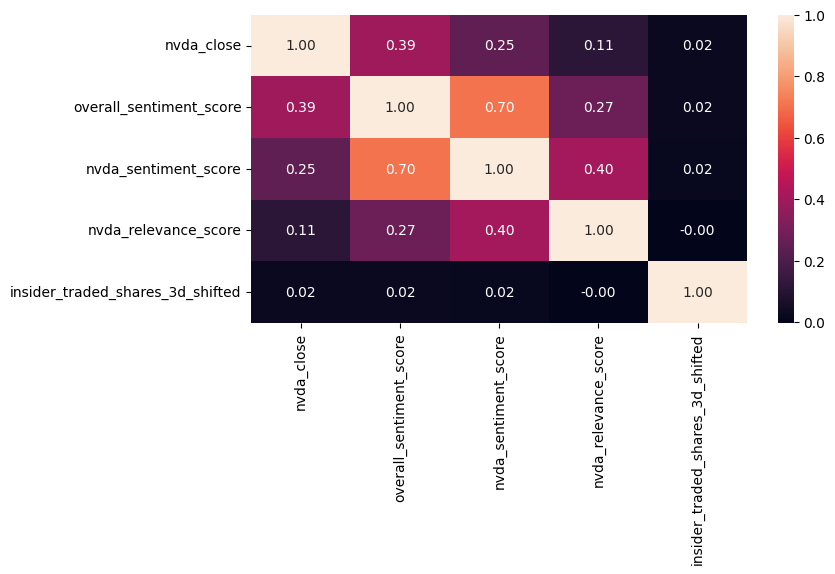

In [13]:
plt.figure(figsize=(8, 4))
cols = [
    "nvda_close",
    "overall_sentiment_score",
    "nvda_sentiment_score",
    "nvda_relevance_score",
    "insider_traded_shares_3d_shifted",
]
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f")

<Axes: >

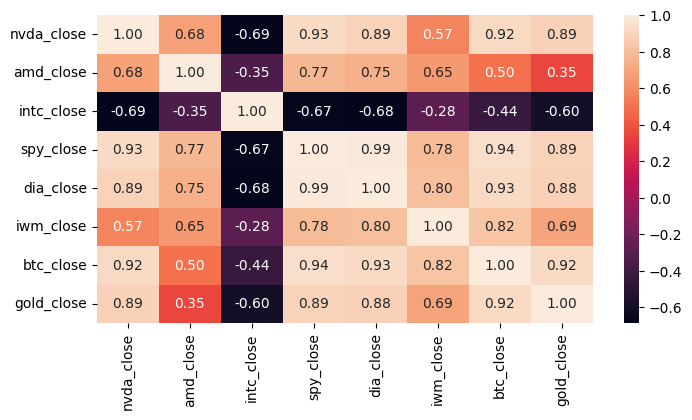

In [14]:
plt.figure(figsize=(8, 4))
cols = [
    "nvda_close",
    "amd_close",
    "intc_close",
    "spy_close",
    "dia_close",
    "iwm_close",
    "btc_close",
    "gold_close",
]
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f")